# 🔎 Exploratory Data Analysis (EDA)

## 📝 Introducción

El Análisis Exploratorio de Datos (EDA) es un paso fundamental en cualquier proyecto de ciencia de datos, ya que nos permite comprender mejor la estructura, las relaciones y los patrones presentes en los datos antes de realizar cualquier modelado o análisis avanzado.

En este proyecto, trabajaremos con dos conjuntos de datos principales:

1. **💓 Cardio Train Dataset**: Este conjunto de datos contiene información sobre diferentes indicadores de salud de personas, como edad, género, altura, peso, presión arterial, colesterol, entre otros. El objetivo es explorar estos datos para identificar posibles correlaciones y patrones que puedan ser útiles para predecir enfermedades cardiovasculares.

2. **🕊️ Cause of Deaths Dataset**: Este conjunto de datos proporciona información sobre las principales causas de muerte a nivel global, desglosadas por país y año. Exploraremos este dataset para entender la distribución de las causas de muerte en diferentes regiones y períodos de tiempo, así como identificar cualquier tendencia o anomalía significativa.

### 🎯 Objetivos del EDA

- **📊 Entender la Distribución de Datos**: Analizar la distribución de las variables individuales para identificar valores atípicos, faltantes, y entender la naturaleza de los datos.
- **🔗 Explorar Relaciones entre Variables**: Investigar posibles correlaciones entre diferentes variables que podrían ser útiles para modelado posterior.
- **🔍 Identificar Patrones y Tendencias**: Buscar patrones y tendencias en los datos que podrían revelar información relevante para los objetivos del proyecto.
- **🛠️ Preparación de Datos**: Realizar las transformaciones necesarias para limpiar y preparar los datos para el análisis y modelado.

### 🛠️ Metodología

1. 📥 **Carga de Datos**: Importar y cargar los datasets en un entorno de análisis.
2. 📊 **Resumen Estadístico**: Obtener un resumen estadístico básico de las variables en los datasets.
3. 📈 **Visualización de Datos**: Utilizar gráficos para visualizar la distribución de las variables y las relaciones entre ellas.
4. 🔍 **Detección de Valores Atípicos y Datos Faltantes**: Identificar y manejar valores atípicos y datos faltantes que puedan afectar el análisis.
5. 🔗 **Análisis de Correlaciones**: Examinar las correlaciones entre variables para identificar posibles relaciones que podrían ser útiles en modelos predictivos.


## 📥 Carga de datos


In [1]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
work_dir = os.getenv('WORK_DIR')


sys.path.append(work_dir)

In [2]:
from src.model.models import CardioTrain
from src.database.dbconnection import getconnection


In [3]:
from sqlalchemy.orm import sessionmaker, declarative_base, aliased
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
engine = getconnection()
Session = sessionmaker(bind=engine)
session = Session()

Conected successfully to database proyecto!


In [32]:
table = aliased(CardioTrain)
query = session.query(table).statement
df = pd.read_sql(query, engine, index_col=None)

## 📊 Resumen Estadístico


In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## 📈 Visualización de Datos


## 🔍 Detección de Valores Atípicos y Datos Faltantes


## 🔗 Análisis de Correlaciones

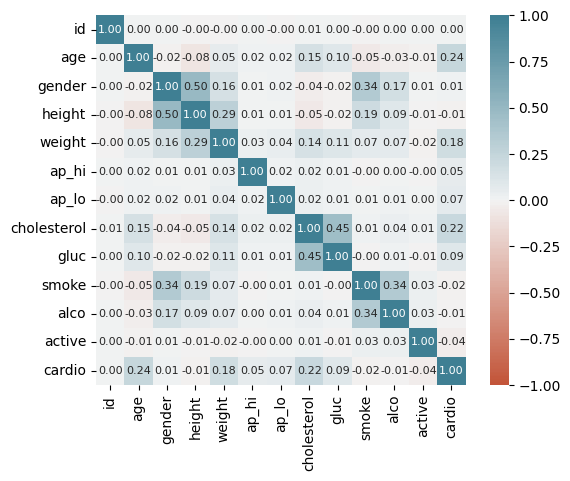

In [36]:
correlation = df.corr()
ax = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt='.2f',
    annot_kws={"size": 8}
)

## Data distribution

In [8]:
def stadistic_count(num):

    stadistic = num.describe().T
    stadistic['median'] = num.median()
    stadistic['skewness'] = num.skew()
    stadistic['kurtosis'] = num.kurtosis()
    stadistic = stadistic.iloc[:,[0,1,8,2,3,4,5,6,7,9,10]]
    #Lo devolvemos
    return(stadistic)

In [9]:
stadistic_count(df.loc[:,['age','height','weight','ap_hi','ap_lo']])


,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
age,70000.0,19468.865814,19703.0,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0,-0.307055,-0.823447
height,70000.0,164.359229,165.0,8.210126,55.0,159.0,165.0,170.0,250.0,-0.642187,7.943653
weight,70000.0,74.205690,72.0,14.395757,10.0,65.0,72.0,82.0,200.0,1.012070,2.586825
ap_hi,70000.0,128.817286,120.0,154.011419,-150.0,120.0,120.0,140.0,16020.0,85.296214,7580.074738
ap_lo,70000.0,96.630414,80.0,188.472530,-70.0,80.0,80.0,90.0,11000.0,32.114083,1425.914585


la edad parece tener un sesgo hacia la derecha, lo cual significa que tiene una cola hacia la derecha en el histograma, por lo que significa que en este dataset hay varias personas con una mayor edad.

height parece tener casi una distribucion normal con una excepcion de que tambien tiene una cola que tira hacia la derecha, lo cual significa que el valor maximo de 2.5 metros es un outliner que debe de ser estudiado

weight tambien parece ser una distribucion similar a la normal pero con un sesgo o cola hacia la izquierda probablemente van a haber valores outliers muy pequeños, por ejemplo el valor minimo de 10kg, lo cual es un peso demasiado pequeño y debe de ser estudiado, tal vez podria ser un dato erroneo por lo poco posible que es.

ap_hi tiene un valor minimo negativo, esto es un dato imposible lo cual significa dato erroneo, debe ser eliminado posteriormente,por esta razon tambien se ve un sesgo hacia la izquierda por lo cual tendremos que comprobar posteriormente cual sera su forma de distribuirse, ademas de tener un dato maximo demasiado extraño y poco posible, debe ser eliminado posteriormente para proximos analisis.

ap_lo igualmente que el ap_hi tiene un valor negativo probablemente erroneo ademas que por esto tiene lo que parece un sesgo muy fuerte hacia la izquierda y tambien tiene un valor maximo erroneo el cual debe de ser eliminado para posteriores analisis.

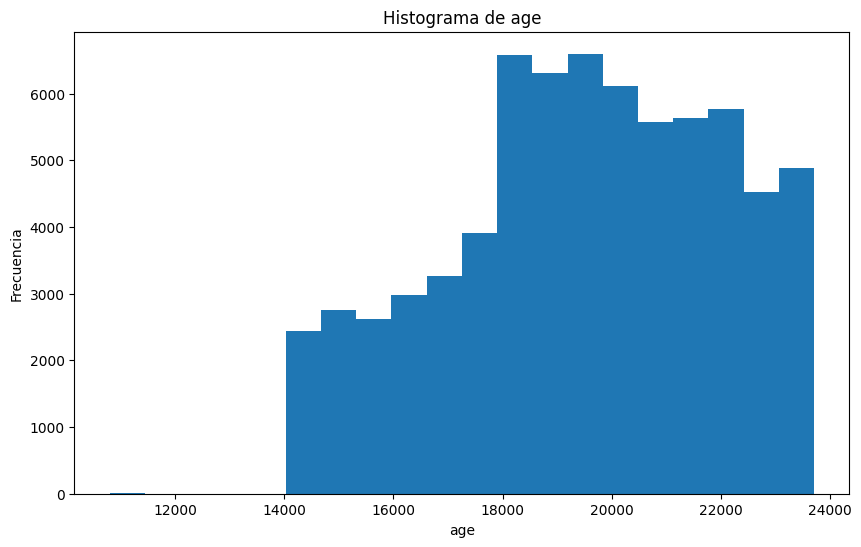

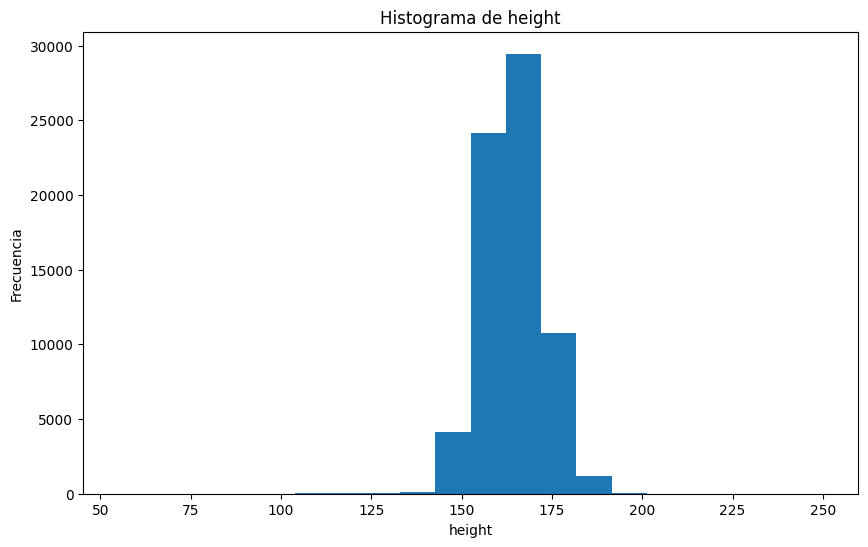

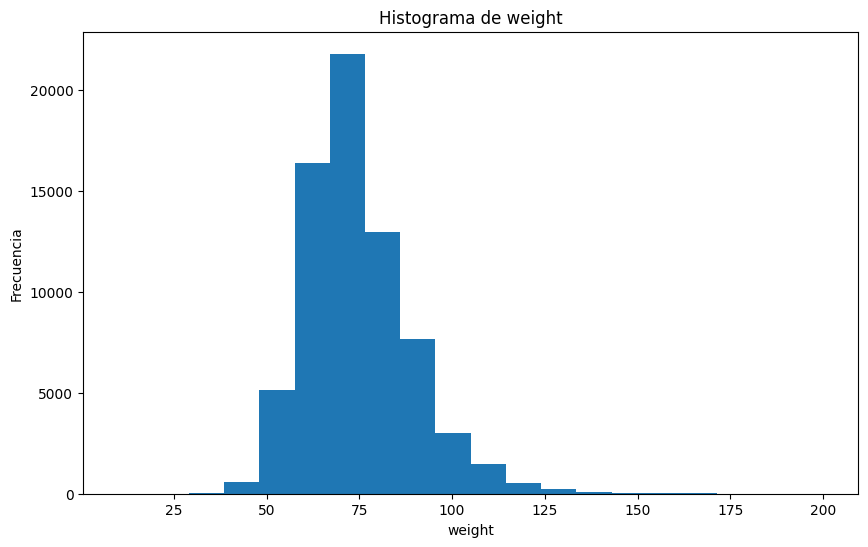

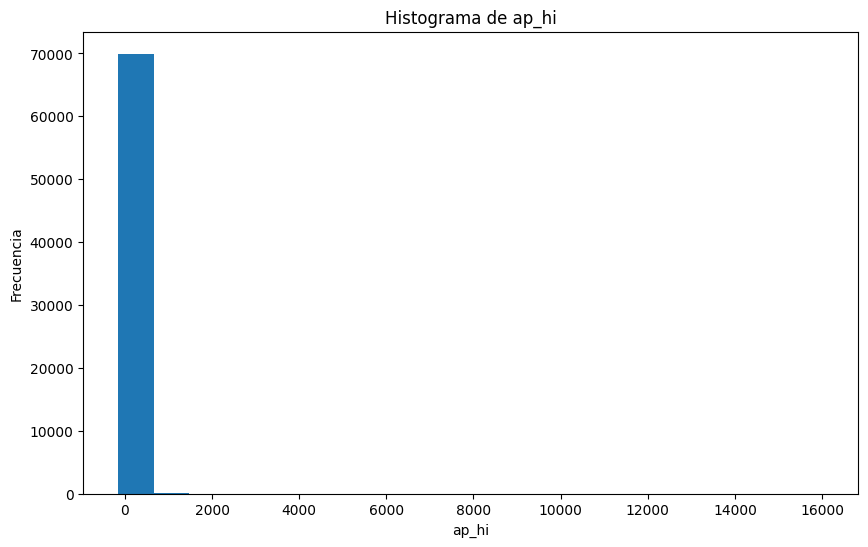

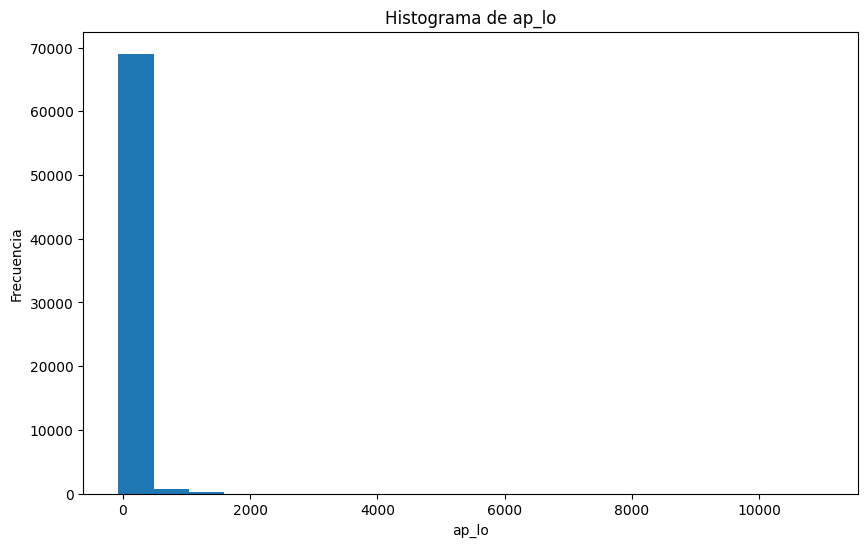

In [10]:
numerical = df.loc[:,['age','height','weight','ap_hi','ap_lo']]
for column in numerical.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(numerical[column], bins=20)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

Ademas del analisis anterioemente con los histogramas podemos ver la frecuencia que siguen las variables numericas donde la mayoria parece tener una sola moda, a excepcion de la variable edad que parece estar totalmente sesgada hacia la derecha, lo cual significa que hay mucha mas cantidad de personas con mayor edad en este estudio que los que tiene menor edad, ademas como se esperaba de los demas datos siguen una distribucion similar a una normal.

## Patterns

In [ ]:
df['cardio'].value_counts(normalize = True) * 100

hay casi igual de cantidad de personas que estan enfermas cardiovascularmente como las que no, esto es bueno para hacer un buen modelo ya que no tendra problemas de sesgo.

<Axes: xlabel='cholesterol'>

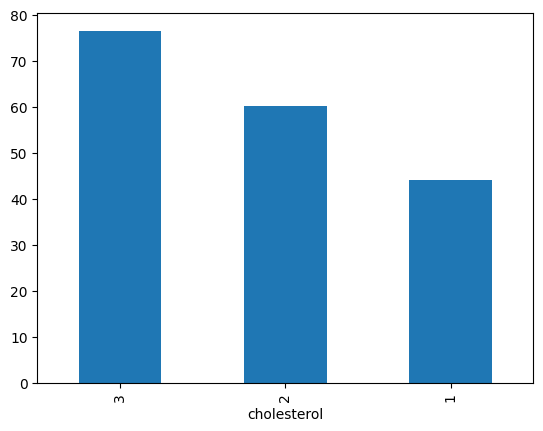

In [12]:
temp = df.groupby('cholesterol').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

<Axes: xlabel='gluc'>

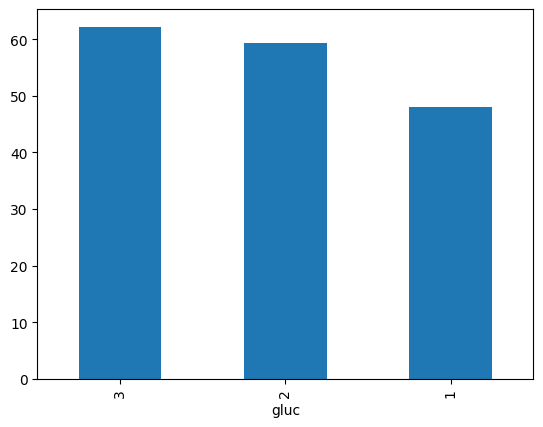

In [11]:
temp = df.groupby('gluc').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

<Axes: xlabel='gender'>

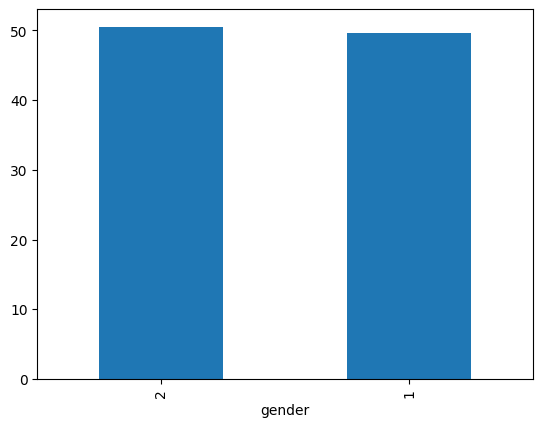

In [13]:
temp = df.groupby('gender').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

<Axes: xlabel='smoke'>

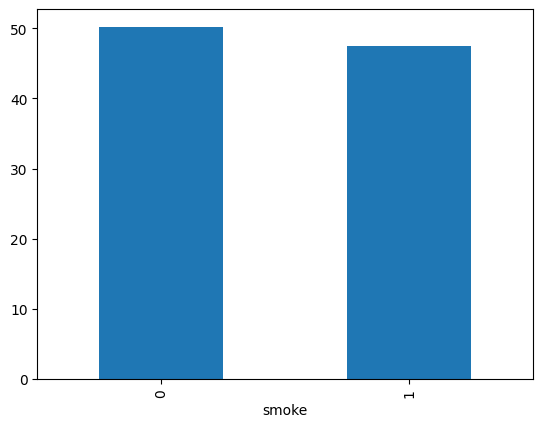

In [14]:
temp = df.groupby('smoke').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

<Axes: xlabel='alco'>

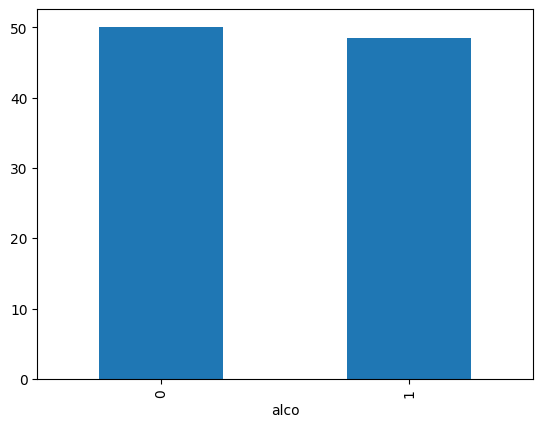

In [15]:
temp = df.groupby('alco').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

<Axes: xlabel='active'>

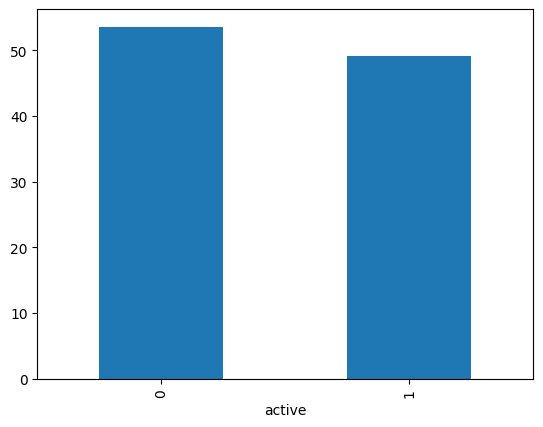

In [16]:
temp = df.groupby('active').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

hay un patron en la gente que tiene enfermedades cardivasculares, cosas que pueden afectar mas que otras por ejemplo las siguientes:

tener un alto nivel de colesterol te hace ser mas propenso a tener enfermedades cardiovasculares, con un 75%

tambien tener un alto nivel de glucosa, alrededor del 60% de la gente que tiene la glucosa alta tiene enfermedades cardiovasculares.

no hay mucha diferencia en tener enfermedades cardiovasculares entre hombres y mujeres aunque hay una ligera diferencia por parte de mujeres, es decir las mujeres tienen un leve aumento en la probabilidad de tener la enfermedad

no hay mucha diferencia para la gente que fuma y bebe tienen una pequeña mayor diferencia de poder tener enfermedades cardiovasculares vs los que no

y finalmente lo mas importante para nuestro estudio parece ser que, las personas que son mas activas tienen una mucha menor probabilidad de contener enfermedades cardiovasculares

## Data Visualization

C:\Users\carol\AppData\Local\Temp\ipykernel_10880\2886038008.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cardio_counts= weight_height_df.groupby(['height_bin', 'weight_bin'])['cardio'].mean() * 100


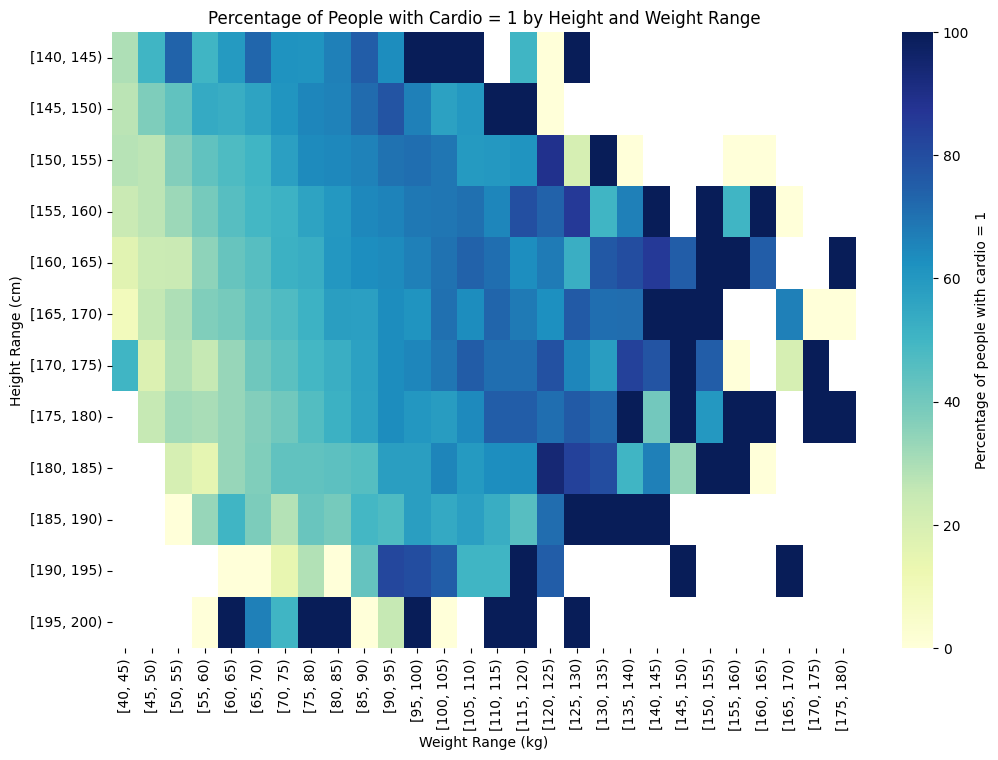

In [33]:
weight_height_df = df.copy()

height_bins = range(140, 201, 5) 
weight_bins = range(40, 181, 5)   

weight_height_df['height_bin'] = pd.cut(weight_height_df['height'], bins=height_bins, right=False)
weight_height_df['weight_bin'] = pd.cut(weight_height_df['weight'], bins=weight_bins, right=False)
cardio_counts= weight_height_df.groupby(['height_bin', 'weight_bin'])['cardio'].mean() * 100
heatmap_data = cardio_counts.unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', fmt=".1f", cbar_kws={'label': 'Percentage of people with cardio = 1'})
plt.title('Percentage of People with Cardio = 1 by Height and Weight Range')
plt.xlabel('Weight Range (kg)')
plt.ylabel('Height Range (cm)')
plt.show()

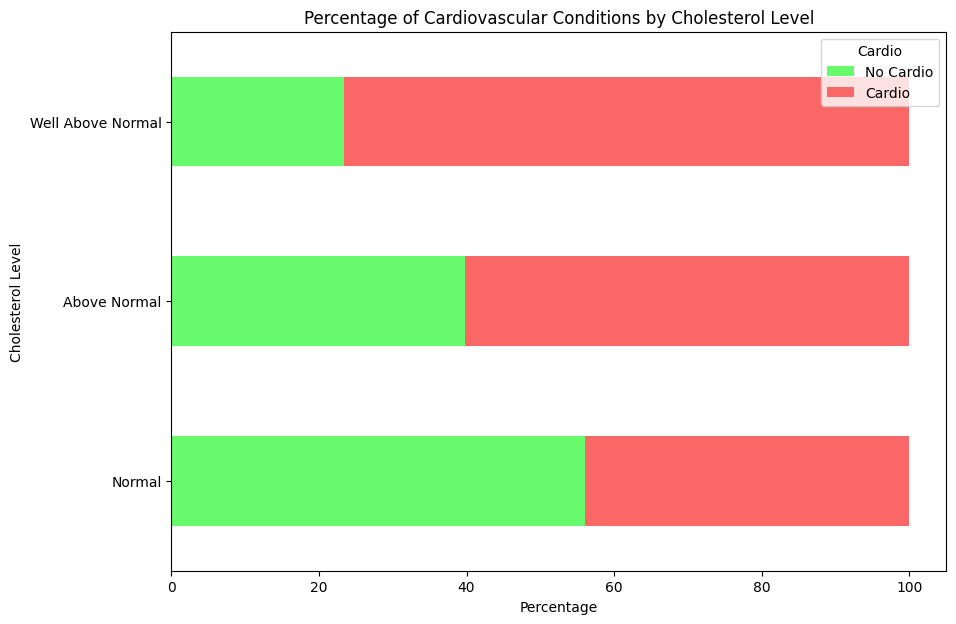

In [8]:
cholesterol_counts = df.groupby(['cholesterol', 'cardio']).size().reset_index(name='count')
total_counts = cholesterol_counts.groupby('cholesterol')['count'].sum().reset_index(name='total')
cholesterol_counts = cholesterol_counts.merge(total_counts, on='cholesterol')
cholesterol_counts['percentage'] = (cholesterol_counts['count'] / cholesterol_counts['total']) * 100

pivot_df = cholesterol_counts.pivot(index='cholesterol', columns='cardio', values='percentage')

colors = {0: '#67fa6c', 1: '#fa6767'}
ax = pivot_df.plot(kind='barh', stacked=True, figsize=(10, 7), color=[colors[col] for col in pivot_df.columns])

ax.set_ylabel('Cholesterol Level')
ax.set_xlabel('Percentage')
ax.set_title('Percentage of Cardiovascular Conditions by Cholesterol Level')
ax.legend(title='Cardio', labels=['No Cardio', 'Cardio'])

plt.yticks(ticks=range(len(pivot_df.index)), labels=['Normal', 'Above Normal', 'Well Above Normal'], rotation=0)
plt.show()

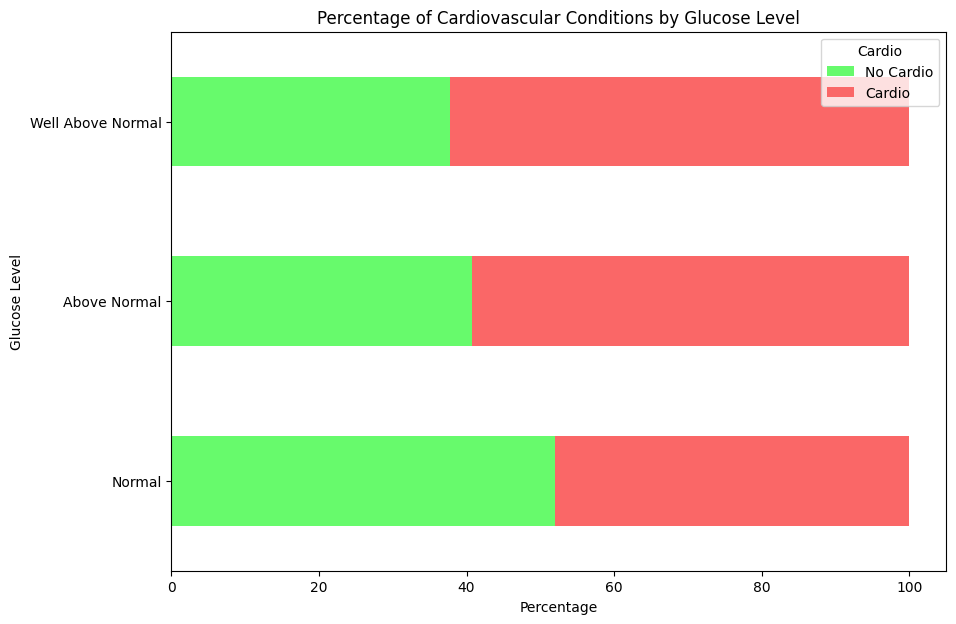

In [9]:
glucose_counts = df.groupby(['gluc', 'cardio']).size().reset_index(name='count')
total_counts = glucose_counts.groupby('gluc')['count'].sum().reset_index(name='total')
glucose_counts = glucose_counts.merge(total_counts, on='gluc')
glucose_counts['percentage'] = (glucose_counts['count'] / glucose_counts['total']) * 100

pivot_df = glucose_counts.pivot(index='gluc', columns='cardio', values='percentage')

colors = {0: '#67fa6c', 1: '#fa6767'}

ax = pivot_df.plot(kind='barh', stacked=True, figsize=(10, 7), color=[colors[col] for col in pivot_df.columns])

ax.set_ylabel('Glucose Level')
ax.set_xlabel('Percentage')
ax.set_title('Percentage of Cardiovascular Conditions by Glucose Level')
ax.legend(title='Cardio', labels=['No Cardio', 'Cardio'])


plt.yticks(ticks=range(len(pivot_df.index)), labels=['Normal', 'Above Normal', 'Well Above Normal'], rotation=0)
plt.show()

In [16]:
def classify_blood_pressure(row):
    if row['ap_hi'] < 120 and row['ap_lo'] < 80:
        return 1  # NORMAL
    elif 120 <= row['ap_hi'] <= 129 and row['ap_lo'] < 80:
        return 2  # ELEVATED
    elif (130 <= row['ap_hi'] <= 139) or (80 <= row['ap_lo'] <= 89):
        return 3  # HIGH BLOOD PRESSURE STAGE 1
    elif (140 <= row['ap_hi'] <= 180) or ( 90 <= row['ap_lo'] <= 120):
        return 4  # HIGH BLOOD PRESSURE STAGE 2
    elif row['ap_hi'] > 180 or row['ap_lo'] > 120:
        return 5  # HYPERTENSIVE CRISIS
    else:
        return None

df['blood_pressure'] = df.apply(classify_blood_pressure, axis=1)

print(df['blood_pressure'].value_counts())

df

blood_pressure
3    39934
4    17141
1     9608
2     3125
5      192
Name: count, dtype: int64


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,blood_pressure
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,3
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,4
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,3
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,4
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,3
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,4
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,4
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,3


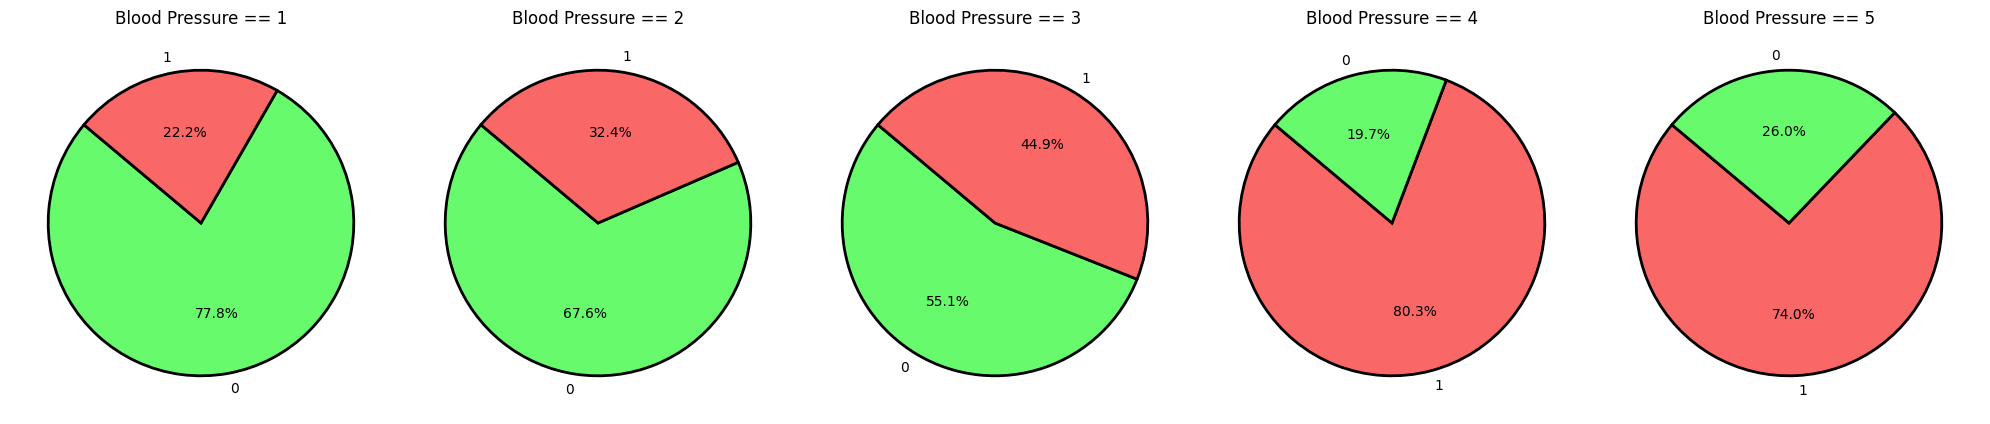

In [17]:
ordered_categories = [1, 2, 3, 4, 5]

fig, axes = plt.subplots(nrows=1, ncols=len(ordered_categories), figsize=(20, 6))

for i, bp in enumerate(ordered_categories):
    df_filtered = df[df['blood_pressure'] == bp]
    cardio_counts = df_filtered['cardio'].value_counts()

    colors = ['#67fa6c' if x == 0 else '#fa6767' for x in cardio_counts.index]
    wedgeprops = {'edgecolor': 'black', 'linewidth': 2}

    axes[i].pie(cardio_counts, labels=cardio_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=wedgeprops)
    axes[i].set_title(f'Blood Pressure == {bp}')

plt.tight_layout()
plt.show()

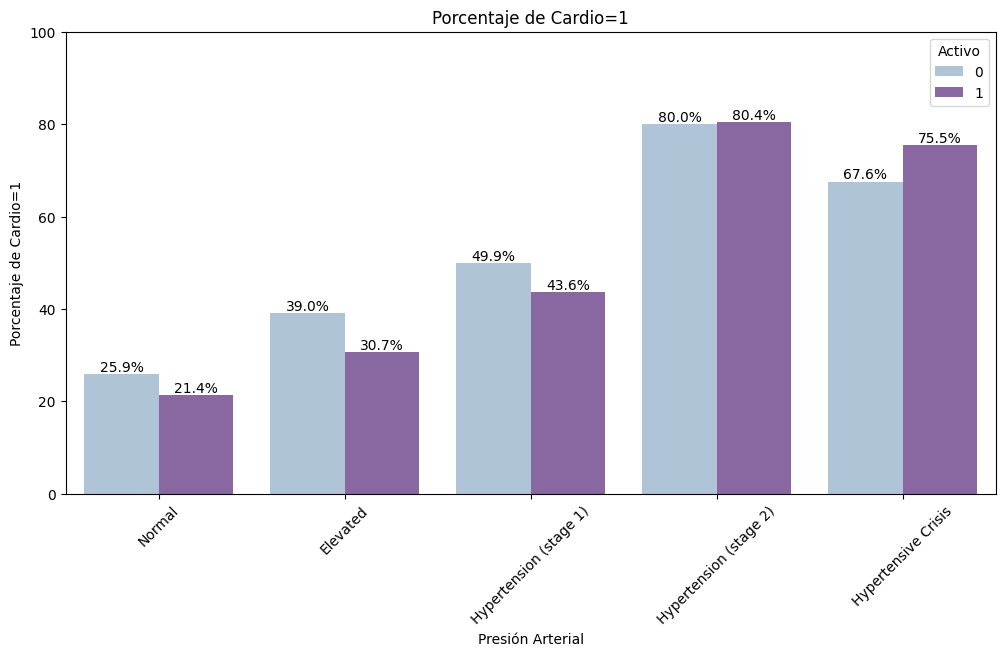

In [23]:
total_counts = df.groupby(['blood_pressure', 'active']).size().reset_index(name='total')

cardio_counts = df[df['cardio'] == 1].groupby(['blood_pressure', 'active']).size().reset_index(name='cardio_count')

merged_df = pd.merge(total_counts, cardio_counts, on=['blood_pressure', 'active'], how='left').fillna(0)

merged_df['percentage'] = (merged_df['cardio_count'] / merged_df['total']) * 100

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=merged_df, x='blood_pressure', y='percentage', hue='active', palette='BuPu')

for p in bar_plot.patches:
    height = p.get_height()
    if height > 0.1:
        bar_plot.annotate(f'{height:.1f}%',
                          (p.get_x() + p.get_width() / 2., height),
                          ha='center', va='center',
                          xytext=(0, 5),
                          textcoords='offset points')

plt.title('Porcentaje de Cardio=1')
plt.xlabel('Presión Arterial')
plt.ylabel('Porcentaje de Cardio=1')
plt.ylim(0, 100)
plt.legend(title='Activo')

labels = {
    0: 'Normal',
    1: 'Elevated',
    2: 'Hypertension (stage 1)',
    3: 'Hypertension (stage 2)',
    4: 'Hypertensive Crisis'
}

plt.xticks(ticks=list(labels.keys()), labels=list(labels.values()), rotation=45)

plt.show()